In [4]:
#Run this cell
#Importing necessary libraries 
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_recall_fscore_support, confusion_matrix, ConfusionMatrixDisplay

import json
ans=[0]*5

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
#Import the dataset and define the feature as well as the target datasets / columns 
df = pd.read_csv("zoo.csv")
df.head()
#We drop the animal names since this is not a good feature to split the data on. 


,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [7]:
df.drop(columns=["animal_name"], inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   hair        101 non-null    int64
 1   feathers    101 non-null    int64
 2   eggs        101 non-null    int64
 3   milk        101 non-null    int64
 4   airborne    101 non-null    int64
 5   aquatic     101 non-null    int64
 6   predator    101 non-null    int64
 7   toothed     101 non-null    int64
 8   backbone    101 non-null    int64
 9   breathes    101 non-null    int64
 10  venomous    101 non-null    int64
 11  fins        101 non-null    int64
 12  legs        101 non-null    int64
 13  tail        101 non-null    int64
 14  domestic    101 non-null    int64
 15  catsize     101 non-null    int64
 16  class_type  101 non-null    int64
dtypes: int64(17)
memory usage: 13.5 KB


In [9]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [10]:
df["class_type"].unique()

array([1, 4, 2, 7, 6, 5, 3])

In [11]:
def entropy(dataframe, target_column):
    entropy = 0
    value_counts = dataframe[target_column].value_counts()

    for i in range(len(value_counts)):
        p = float(value_counts.iloc[i]) / float(value_counts.sum())
        entropy += -1.0 * p * np.log2(p)

    return entropy

In [12]:
#Find the entropy of all the features in the dataset
#Save all the feature names in an array "feature names"
feature_names=['hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone', 
               'breathes','venomous','fins','legs','tail','domestic','catsize']

In [13]:
#Find the entropy of the feature "toothed"

ans[0] = entropy(df, 'toothed')
ans[0]

0.9685867165455516

In [14]:
#Write a function to calculate Information Gain on a split attribute and a target column
def InfoGain(dataset, split_attribute_name, target_name="class"): 
    original_entropy = entropy(dataset, target_name)
    vals = []

    for i in dataset[split_attribute_name].unique():
        vals.append(i) 

    spl = []    

    for x in range(len(vals)):
        spl.append(dataset[dataset[split_attribute_name] == vals[x]])

    entropy_list = []
    wts = []
    total1 = 0

    for x in range(len(spl)):
        wt = len(spl[x][split_attribute_name]) / len(dataset[split_attribute_name])
        wts.append(wt)
        entropy_level = entropy(spl[x], target_name)
        entropy_list.append(entropy_level)
    
    for i in range(0, len(wts)):
        if entropy_list[i] > 0:
             total1 = total1 + wts[i] * entropy_list[i]
        
    return original_entropy - total1 

In [15]:
#Find the information gain having split attribute "hair" and the target feature name "milk"

ans[1] = InfoGain(df, "hair", "milk")
ans[1]

0.6599660577558698

In [16]:
#Find the Info gain having "milk" as the split attribute and all the other features as target features one at a time
cols = [col for col in df.columns if col not in ['milk', 'class_type']]

for col in cols:
    print("Information gain with split attribute: milk and target feature:", col, " is:", InfoGain(df,"milk",col))

Information gain with split attribute: milk and target feature: hair  is: 0.6599660577558698
Information gain with split attribute: milk and target feature: feathers  is: 0.17242769884415887
Information gain with split attribute: milk and target feature: eggs  is: 0.7870598185734241
Information gain with split attribute: milk and target feature: airborne  is: 0.11370352314621812
Information gain with split attribute: milk and target feature: aquatic  is: 0.10181386403185944
Information gain with split attribute: milk and target feature: predator  is: 0.0006367772440212249
Information gain with split attribute: milk and target feature: toothed  is: 0.3465412540071714
Information gain with split attribute: milk and target feature: backbone  is: 0.15262359382508262
Information gain with split attribute: milk and target feature: breathes  is: 0.18259765312929543
Information gain with split attribute: milk and target feature: venomous  is: 0.06284178150207947
Information gain with split att

In [17]:
#Import Decision Tree Classifier from sklearn 
from sklearn.tree import DecisionTreeClassifier
#Split the given data into 80 percent training data and 20 percent testing data
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
#Fit the given data
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [19]:
preds = decision_tree.predict(X_test)
print("True labels:", y_test.values)
print("Predicted labels:", preds)

True labels: [1 1 1 1 1 6 1 1 1 1 4 6 6 2 7 1 1 2 4 1 3]
Predicted labels: [1 1 1 1 1 6 1 1 1 1 4 6 6 2 7 1 1 2 4 1 5]


In [20]:
#Make a prediction on the test data and return the percentage of accuracy
accuracy = sum([1 for i in range(len(y_test)) if y_test.values[i] == preds[i]])/len(y_test)
ans[2] = accuracy
accuracy 

0.9523809523809523

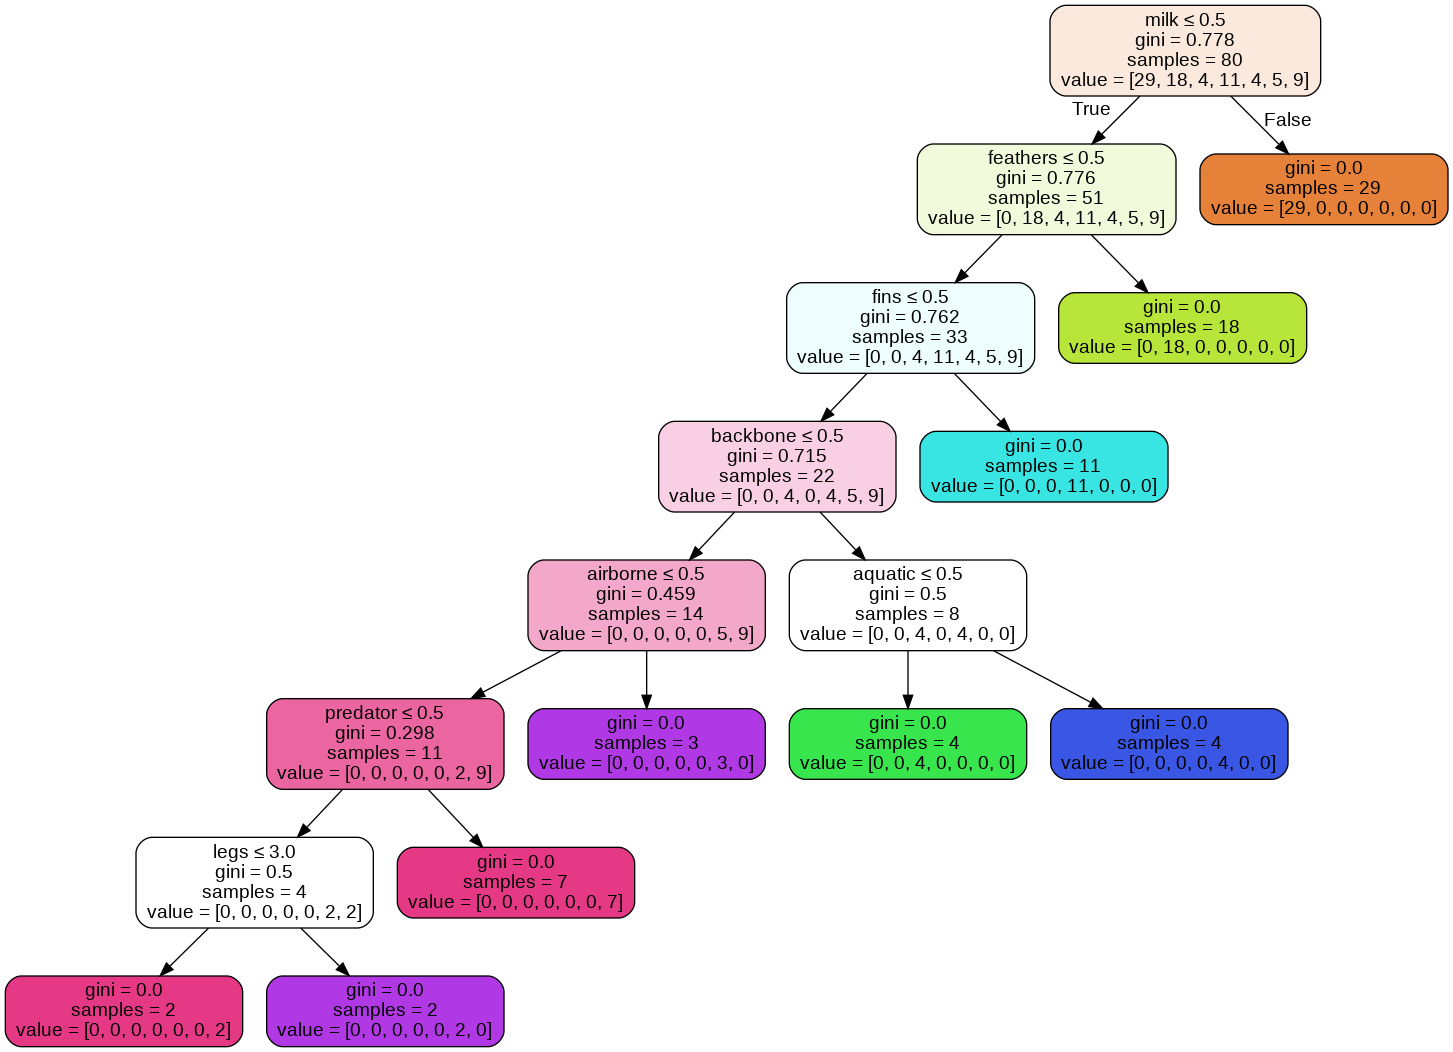

In [21]:
#Run this cell to visualize the decision tree
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(decision_tree, out_file=dot_data, feature_names=feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [22]:
#Use sklearn to make a classification report and a confusion matrix
target_names = [i+1 for i in range(len(df["class_type"].unique()))]
print(classification_report(y_test.values, preds))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         2
           5       0.00      0.00      0.00         0
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.71      0.71      0.71        21
weighted avg       0.95      0.95      0.95        21



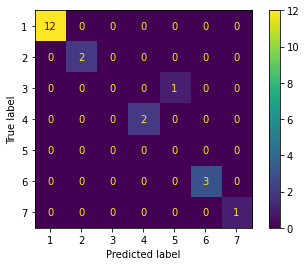

In [23]:
cm = confusion_matrix(y_test.values, preds, labels=target_names)
cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names).plot();
plt.show()

In [24]:
metrics = precision_recall_fscore_support(y_test.values, preds)
recall = metrics[1][2]
f1_score = metrics[2][2]

In [25]:
#Find the recall,f1-score for class type '3'
ans[3] = [recall, f1_score]
ans[3]

[0.0, 0.0]

In [26]:
#Calculate Mean Absolute Error,Mean Squared Error and Root Mean Squared Error
mean_absolute_error = sum([abs(y_test.values[i]-preds[i]) for i in range(len(y_test))])/len(y_test)
mean_squared_error = sum([(y_test.values[i]-preds[i])**2 for i in range(len(y_test))])/len(y_test)
rmse = np.sqrt(mean_squared_error)
rmse

0.4364357804719847

In [27]:
#Find the mean absolute error and root mean square error, save then in a list [mae,rmse]
ans[4] = [mean_absolute_error, rmse]
ans[4]

[0.09523809523809523, 0.4364357804719847]

In [28]:
##do not change this code
import json
ans = [str(item) for item in ans]

filename = "shethdivyanshu2000@gmail.com_Divyanshu_Sheth_DecisionTrees"

# Eg if your name is Saurav Joshi and email id is sauravjoshi123@gmail.com, filename becomes
# filename = sauravjoshi123@gmail.com_Saurav_Joshi_LinearRegression

## Do not change anything below!!
- Make sure you have changed the above variable "filename" with the correct value. Do not change anything below!!

In [29]:
from importlib import import_module
import os
from pprint import pprint

findScore = import_module('findScore')
response = findScore.main(ans)
response['details'] = filename
with open(f'evaluation_{filename}.json', 'w') as outfile:
    json.dump(response, outfile)
pprint(response)

{'Comments': 'Please make sure the Python script you are submitting is not '
             'having errors. Try running before submitting',
 'Message': 'Successfully submitted! Thanks for taking the exercise',
 'details': 'shethdivyanshu2000@gmail.com_Divyanshu_Sheth_DecisionTrees',
 'status': 'Success'}


In [30]:
print(ans)

['0.9685867165455516', '0.6599660577558698', '0.9523809523809523', '[0.0, 0.0]', '[0.09523809523809523, 0.4364357804719847]']
